In [1]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from imutils import paths
import shutil
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import os
import shutil
import zipfile
import random



In [ ]:

######## to delete any directory #######################

folder = '/content/train/empty'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))


In [3]:
################ extract the file to a folder named data ######################

with zipfile.ZipFile('/content/PondData.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')

In [4]:

############### create folders #########################

os.mkdir('/content/train/')
os.mkdir('/content/test/')

os.mkdir('/content/train/full')
os.mkdir('/content/train/partial')
os.mkdir('/content/train/empty')

os.mkdir('/content/test/full')
os.mkdir('/content/test/partial')
os.mkdir('/content/test/empty')


########### divide the class folder into train and test folder based on percent argument #################
def copy_file(src,percent):
  files_list = os.listdir(src)
  splitVal = int(round((1-percent)*len(files_list)))
  train_file_list = files_list[:splitVal]
  test_file_list = files_list[splitVal:]
  return train_file_list,test_file_list



train_file_list,test_file_list = copy_file('/content/data/data/Full',0.03)
print(len(train_file_list),len(test_file_list))

for i in train_file_list:
  shutil.copy('/content/data/data/Full/'+i,'/content/train/full/')

for i in test_file_list:
  shutil.copy('/content/data/data/Full/'+i,'/content/test/full/')


train_file_list,test_file_list = copy_file('/content/data/data/Partial',0.05)
print(len(train_file_list),len(test_file_list))

for i in train_file_list:
  shutil.copy('/content/data/data/Partial/'+i,'/content/train/partial/')

for i in test_file_list:
  shutil.copy('/content/data/data/Partial/'+i,'/content/test/partial/')


train_file_list,test_file_list = copy_file('/content/data/data/Empty',0.03)
print(len(train_file_list),len(test_file_list))

for i in train_file_list:
  shutil.copy('/content/data/data/Empty/'+i,'/content/train/empty/')

for i in test_file_list:
  shutil.copy('/content/data/data/Empty/'+i,'/content/test/empty/')


partial_save ='/content/train/partial/'
empty_save = '/content/train/empty/'
full_save ='/content/train/full/'



folder_partial = os.listdir(partial_save)
folder_empty =  os.listdir(empty_save)
folder_full =  os.listdir(full_save)



######################## populate the partial class with the augmented images #######################
for i in range(70):
  num = random.randint(0,len(folder_partial)-1)
  img_name = folder_partial[num]

  if img_name.endswith('.png'):
    im = Image.open('/content/train/partial/'+img_name)
    img = np.array(im)
    flipped_lr = np.fliplr(img)
    flipped_lr = Image.fromarray(flipped_lr).save(partial_save+img_name.split('.')[0]+'_flipped_lr.png')

    flipped_ud = np.flipud(img)
    flipped_ud = Image.fromarray(flipped_ud).save(partial_save+img_name.split('.')[0]+'_flipped_ud.png')

    random_degree = random.uniform(-80, 80)
    rotated = im.rotate(random_degree)
    rotated.save(partial_save+img_name.split('.')[0]+'_rotated_{}.png'.format(random_degree))

print('Total augmented data for partial images are : ', len(os.listdir(partial_save)))

######################## populate the empty class with the augmented images #######################

for i in range(35):
  num = random.randint(0,len(folder_empty)-1)
  img_name = folder_empty[num]

  if img_name.endswith('.png'):
    im = Image.open('/content/train/empty/'+img_name)
    img = np.array(im)
    flipped_lr = np.fliplr(img)
    flipped_lr = Image.fromarray(flipped_lr).save(empty_save+img_name.split('.')[0]+'_flipped_lr.png')

    flipped_ud = np.flipud(img)
    flipped_ud = Image.fromarray(flipped_ud).save(empty_save+img_name.split('.')[0]+'_flipped_ud.png')

    random_degree = random.uniform(-80, 80)
    rotated = im.rotate(random_degree)
    rotated.save(empty_save+img_name.split('.')[0]+'_rotated_{}.png'.format(random_degree))

print('Total augmented data for empty images are : ', len(os.listdir(empty_save)))

######################## populate the full class with the augmented images #######################

for i in range(10):
  num = random.randint(0,len(folder_full)-1)
  img_name = folder_full[num]

  if img_name.endswith('.png'):
    im = Image.open('/content/train/full/'+img_name)
    img = np.array(im)
    flipped_lr = np.fliplr(img)
    flipped_lr = Image.fromarray(flipped_lr).save(full_save+img_name.split('.')[0]+'_flipped_lr.png')

    flipped_ud = np.flipud(img)
    flipped_ud = Image.fromarray(flipped_ud).save(full_save+img_name.split('.')[0]+'_flipped_ud.png')

    random_degree = random.uniform(-80, 80)
    rotated = im.rotate(random_degree)
    rotated.save(full_save+img_name.split('.')[0]+'_rotated_{}.png'.format(random_degree))

print('Total augmented data for full images are : ', len(os.listdir(full_save)))


1610 50
29 2
622 19
Total augmented data for partial images are :  155
Total augmented data for empty images are :  721
Total augmented data for full images are :  1640


In [5]:
import os
Full = os.listdir('/content/train/full')
Partial = os.listdir('/content/train/partial')
Empty = os.listdir('/content/train/empty')

print('number of images in full category : ',len(Full))
print('number of images in partial category : ',len(Partial))
print('number of images in empty category : ',len(Empty))



number of images in full category :  1640
number of images in partial category :  155
number of images in empty category :  721


In [6]:
import os
Full = os.listdir('/content/test/full')
Partial = os.listdir('/content/test/partial')
Empty = os.listdir('/content/test/empty')

print('number of images in full category : ',len(Full))
print('number of images in partial category : ',len(Partial))
print('number of images in empty category : ',len(Empty))

number of images in full category :  50
number of images in partial category :  2
number of images in empty category :  19


In [ ]:
!pip install torchnet

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms

from tqdm import tqdm
# from torchinfo import summary
from torch.utils.data import DataLoader

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os

import copy
import seaborn as sn
import pandas as pd
import torchnet.meter.confusionmeter as cm

In [9]:
############# load the images #############
def load_images(path):

    images = []
    filenames = os.listdir(path)

    for filename in tqdm(filenames):
        if not filename.endswith('.png') and  not filename.endswith('.jpg') :
            continue
        image = cv2.imread(os.path.join(path, filename))
        image = cv2.resize(image, dsize=(100,100))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)

    return np.array(images)

In [10]:
empty_train = load_images('/content/train/empty')
partial_train = load_images('/content/train/partial')
full_train = load_images('/content/train/full')

empty_test = load_images('/content/test/empty')
partial_test = load_images('/content/test/partial')
full_test = load_images('/content/test/full')
#full_test = full_test[:100]

100%|██████████| 50/50 [00:00<00:00, 2380.96it/s]


In [11]:
print(empty_train.shape)
print(partial_train.shape)
print(full_train.shape)
print(empty_test.shape)
print(partial_test.shape)
print(full_test.shape)


X_train = np.append(empty_train, partial_train, axis=0)
X_train = np.append(X_train,full_train,axis = 0)
X_test  = np.append(empty_test, partial_test, axis=0)
X_test = np.append(X_test,full_test,axis = 0 )

print(X_train.shape)
print(X_test.shape)

(721, 100, 100, 3)
(155, 100, 100, 3)
(1640, 100, 100, 3)
(19, 100, 100, 3)
(2, 100, 100, 3)
(50, 100, 100, 3)
(2516, 100, 100, 3)
(71, 100, 100, 3)


In [12]:
y_train = np.array([0] * len(empty_train) + [1] * len(partial_train)+[2]* len(full_train))
y_test = np.array([0] * len(empty_test) + [1] * len(partial_test)+[2]* len(full_test))

print(y_train.shape)
print(y_test.shape)

(2516,)
(71,)


In [13]:
def show_images(images, labels, start_index):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,12))

    counter = start_index

    for i in range(3):
        for j in range(4):
            axes[i,j].set_title(labels[counter].item())
            axes[i,j].imshow(images[counter], cmap='gray')
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            counter += 1
    plt.show()

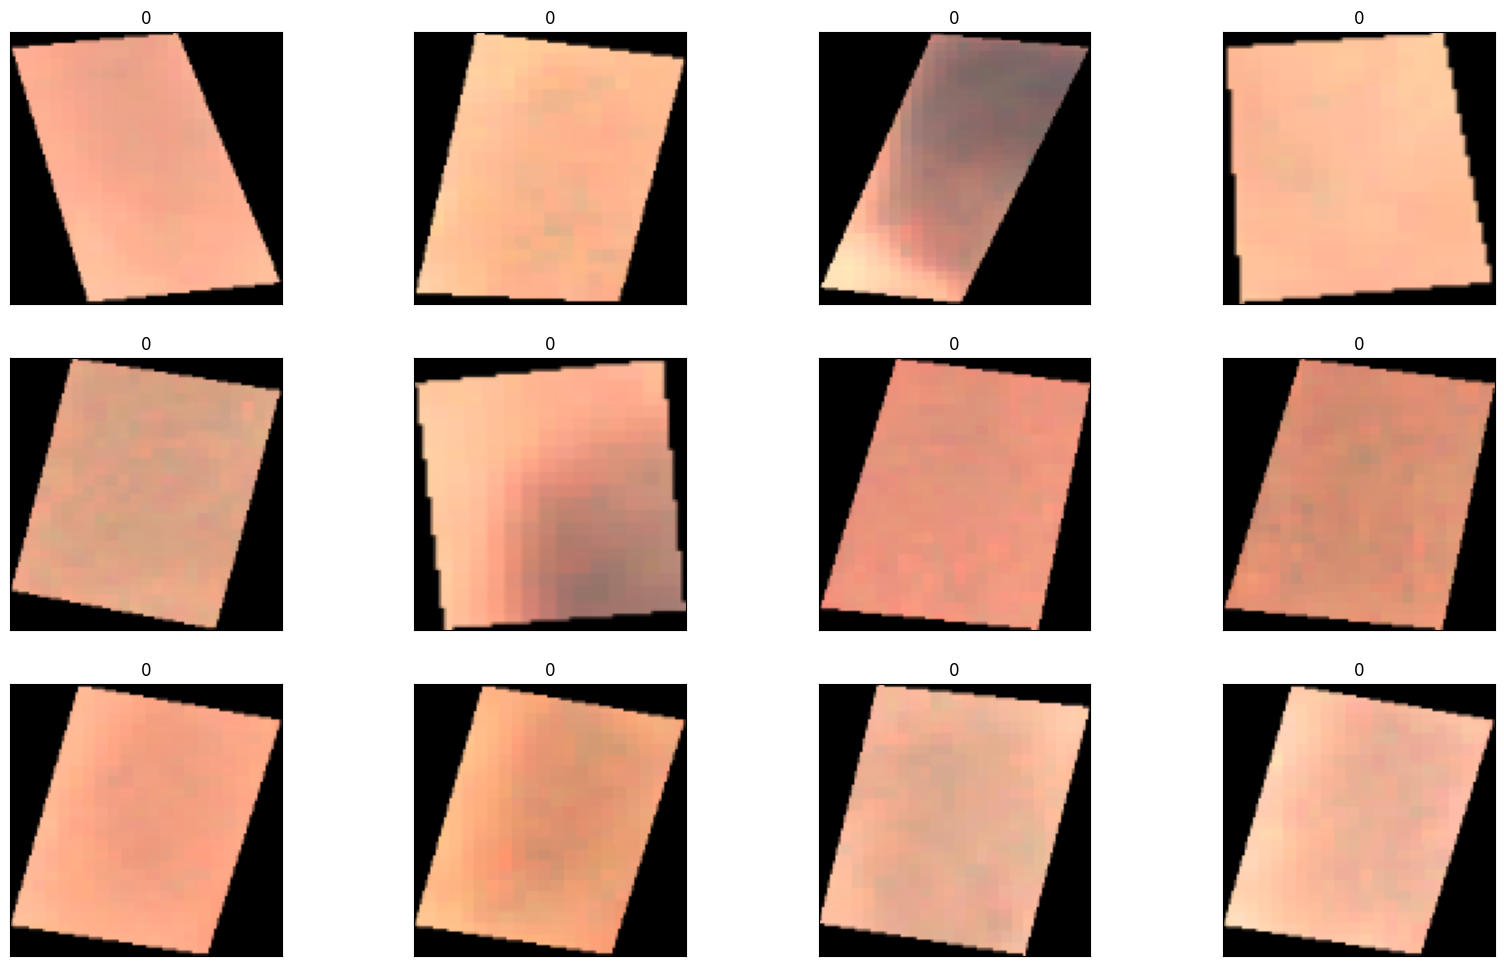

In [14]:
show_images(X_train, y_train, 200)

In [15]:
print(y_train[:10])
y_train = torch.from_numpy(y_train.reshape(len(y_train),1))
y_test = torch.from_numpy(y_test.reshape(len(y_test),1))

print(y_train[-10:])

[0 0 0 0 0 0 0 0 0 0]
tensor([[2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2]])


In [16]:
transforms_train = transforms.Compose([
                                        transforms.ToTensor(),
                                        #transforms.CenterCrop(60),
                                     #   transforms.Resize(100)
                                       # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                      ])

transforms_test = transforms.Compose([transforms.ToTensor(),
                                      # transforms.CenterCrop(60),
                                      # transforms.Resize(100)
                                     #  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                    ])
class pond_Dataset():
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]

        if self.transform:
            image = self.transform(image)

        return (image, label)

train_dataset = pond_Dataset(images=X_train, labels=y_train, transform=transforms_train)
test_dataset  = pond_Dataset(images=X_test, labels=y_test, transform=transforms_test)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
test_loader  = DataLoader(test_dataset, batch_size=72, shuffle=True, drop_last=True)


In [ ]:
for train,lab in test_loader:
  print(train,lab)
  break

In [17]:
iterator = iter(train_loader)
image_batch, label_batch = next(iterator)
print(image_batch.shape,label_batch.shape)

torch.Size([16, 3, 100, 100]) torch.Size([16, 1])


torch.Size([16, 100, 100, 3])


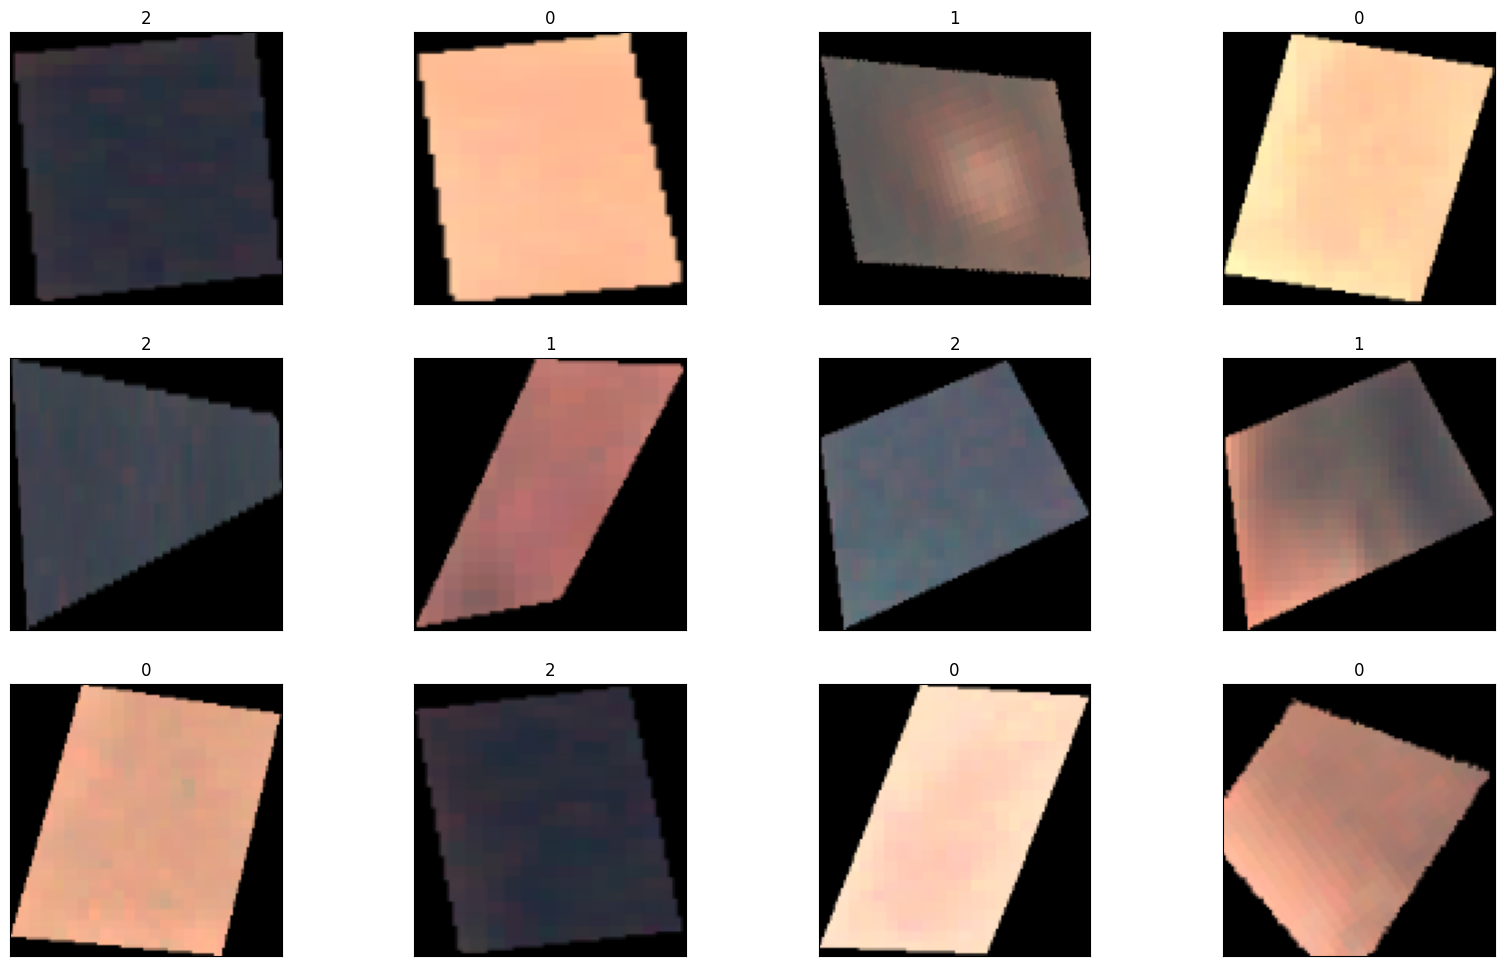

In [18]:
image_batch_permuted = image_batch.permute(0, 2, 3, 1)
print(image_batch_permuted.shape)
show_images(image_batch_permuted, label_batch, 0)

In [19]:
from torchvision import models
model = models.resnet50(pretrained=False)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [20]:
n_inputs = model.fc.in_features
model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256),
                      nn.ReLU(),
                   #   nn.Dropout(0.4),
                      nn.Linear(256, 3),
                      nn.LogSoftmax(dim=1))

# Whether to train on a gpu
#train_on_gpu = cuda.is_available()
train_on_gpu = True
model = model.to('cuda')
from torch import optim



In [21]:

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())
save_file_name = '/content/resnet50-pond.pt'
checkpoint_path = '/content/resnet50-pond.pth'

In [22]:
#from timeit import Timer

def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=20,
          print_every=1):

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf
    valid_best_acc = 0
    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    #overall_start = Timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
    #    start = Timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Clear gradients
            optimizer.zero_grad()
            # Predicted outputs are log probabilities
            output = model(data)
       #     print(output.shape,target.squeeze(1).shape)
            # Loss and backpropagation of gradients
            loss = criterion(output, target.squeeze(1))
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)

            correct_tensor = pred.eq(target.data.view_as(pred))
            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target.squeeze(1))


                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                   # print(pred[:5],target[:5])
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    #print(correct_tensor)
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_acc > valid_best_acc:
                    print('model performed better')
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                       # total_time = timer() - overall_start
                        # print(
                        #     f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        # )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))
                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history

    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
  #  total_time = Timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    # print(
    #     f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    # )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

# Running the model
model, history = train(
    model,
    criterion,
    optimizer,
    train_loader,
    test_loader,
    save_file_name=save_file_name,
    max_epochs_stop=100,
    n_epochs=50,
    print_every=1)

Starting Training from Scratch.


Epoch: 0 	Training Loss: 0.2868 	Validation Loss: 0.1199
		Training Accuracy: 90.46%	 Validation Accuracy: 95.83%
model performed better
Epoch: 1	100.00% complete.
Epoch: 1 	Training Loss: 0.2332 	Validation Loss: 0.1353
		Training Accuracy: 93.52%	 Validation Accuracy: 95.83%
Epoch: 2	100.00% complete.
Epoch: 2 	Training Loss: 0.1583 	Validation Loss: 0.2857
		Training Accuracy: 94.74%	 Validation Accuracy: 93.06%

Epoch: 3 	Training Loss: 0.1420 	Validation Loss: 0.1402
		Training Accuracy: 95.09%	 Validation Accuracy: 97.22%
model performed better

Epoch: 4 	Training Loss: 0.1053 	Validation Loss: 0.1359
		Training Accuracy: 95.92%	 Validation Accuracy: 97.22%

Epoch: 5 	Training Loss: 0.1313 	Validation Loss: 0.2199
		Training Accuracy: 95.80%	 Validation Accuracy: 97.22%

Epoch: 6 	Training Loss: 0.1079 	Validation Loss: 0.1206
		Training Accuracy: 96.82%	 Validation Accuracy: 98.61%
model performed better
Epoch: 7	100.00% complete.
Epoch: 7 	Trai

Text(0.5, 1.0, 'Training and Validation Losses')

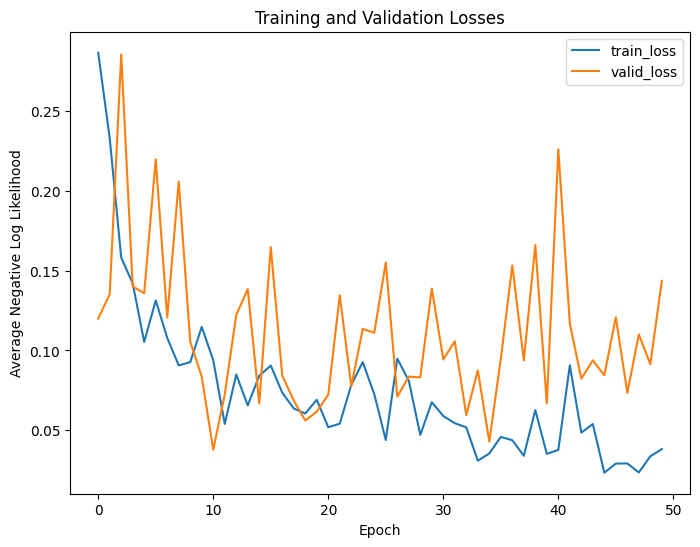

In [23]:
plt.figure(figsize=(8, 6))
for c in ['train_loss', 'valid_loss']:
    plt.plot(
        history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Validation Losses')

Text(0.5, 1.0, 'Training and Validation Accuracy')

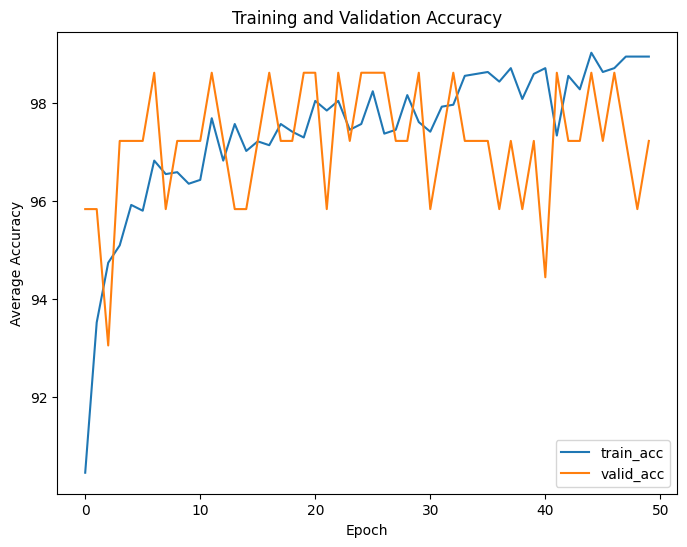

In [24]:
plt.figure(figsize=(8, 6))
for c in ['train_acc', 'valid_acc']:
    plt.plot(
        100 * history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Validation Accuracy')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


72


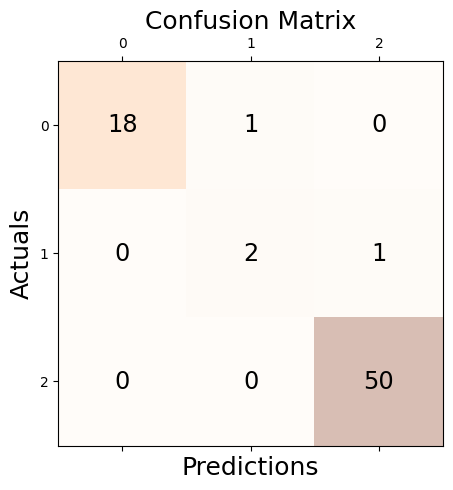

precision :  0.9724945533769063
recall :  0.9722222222222222


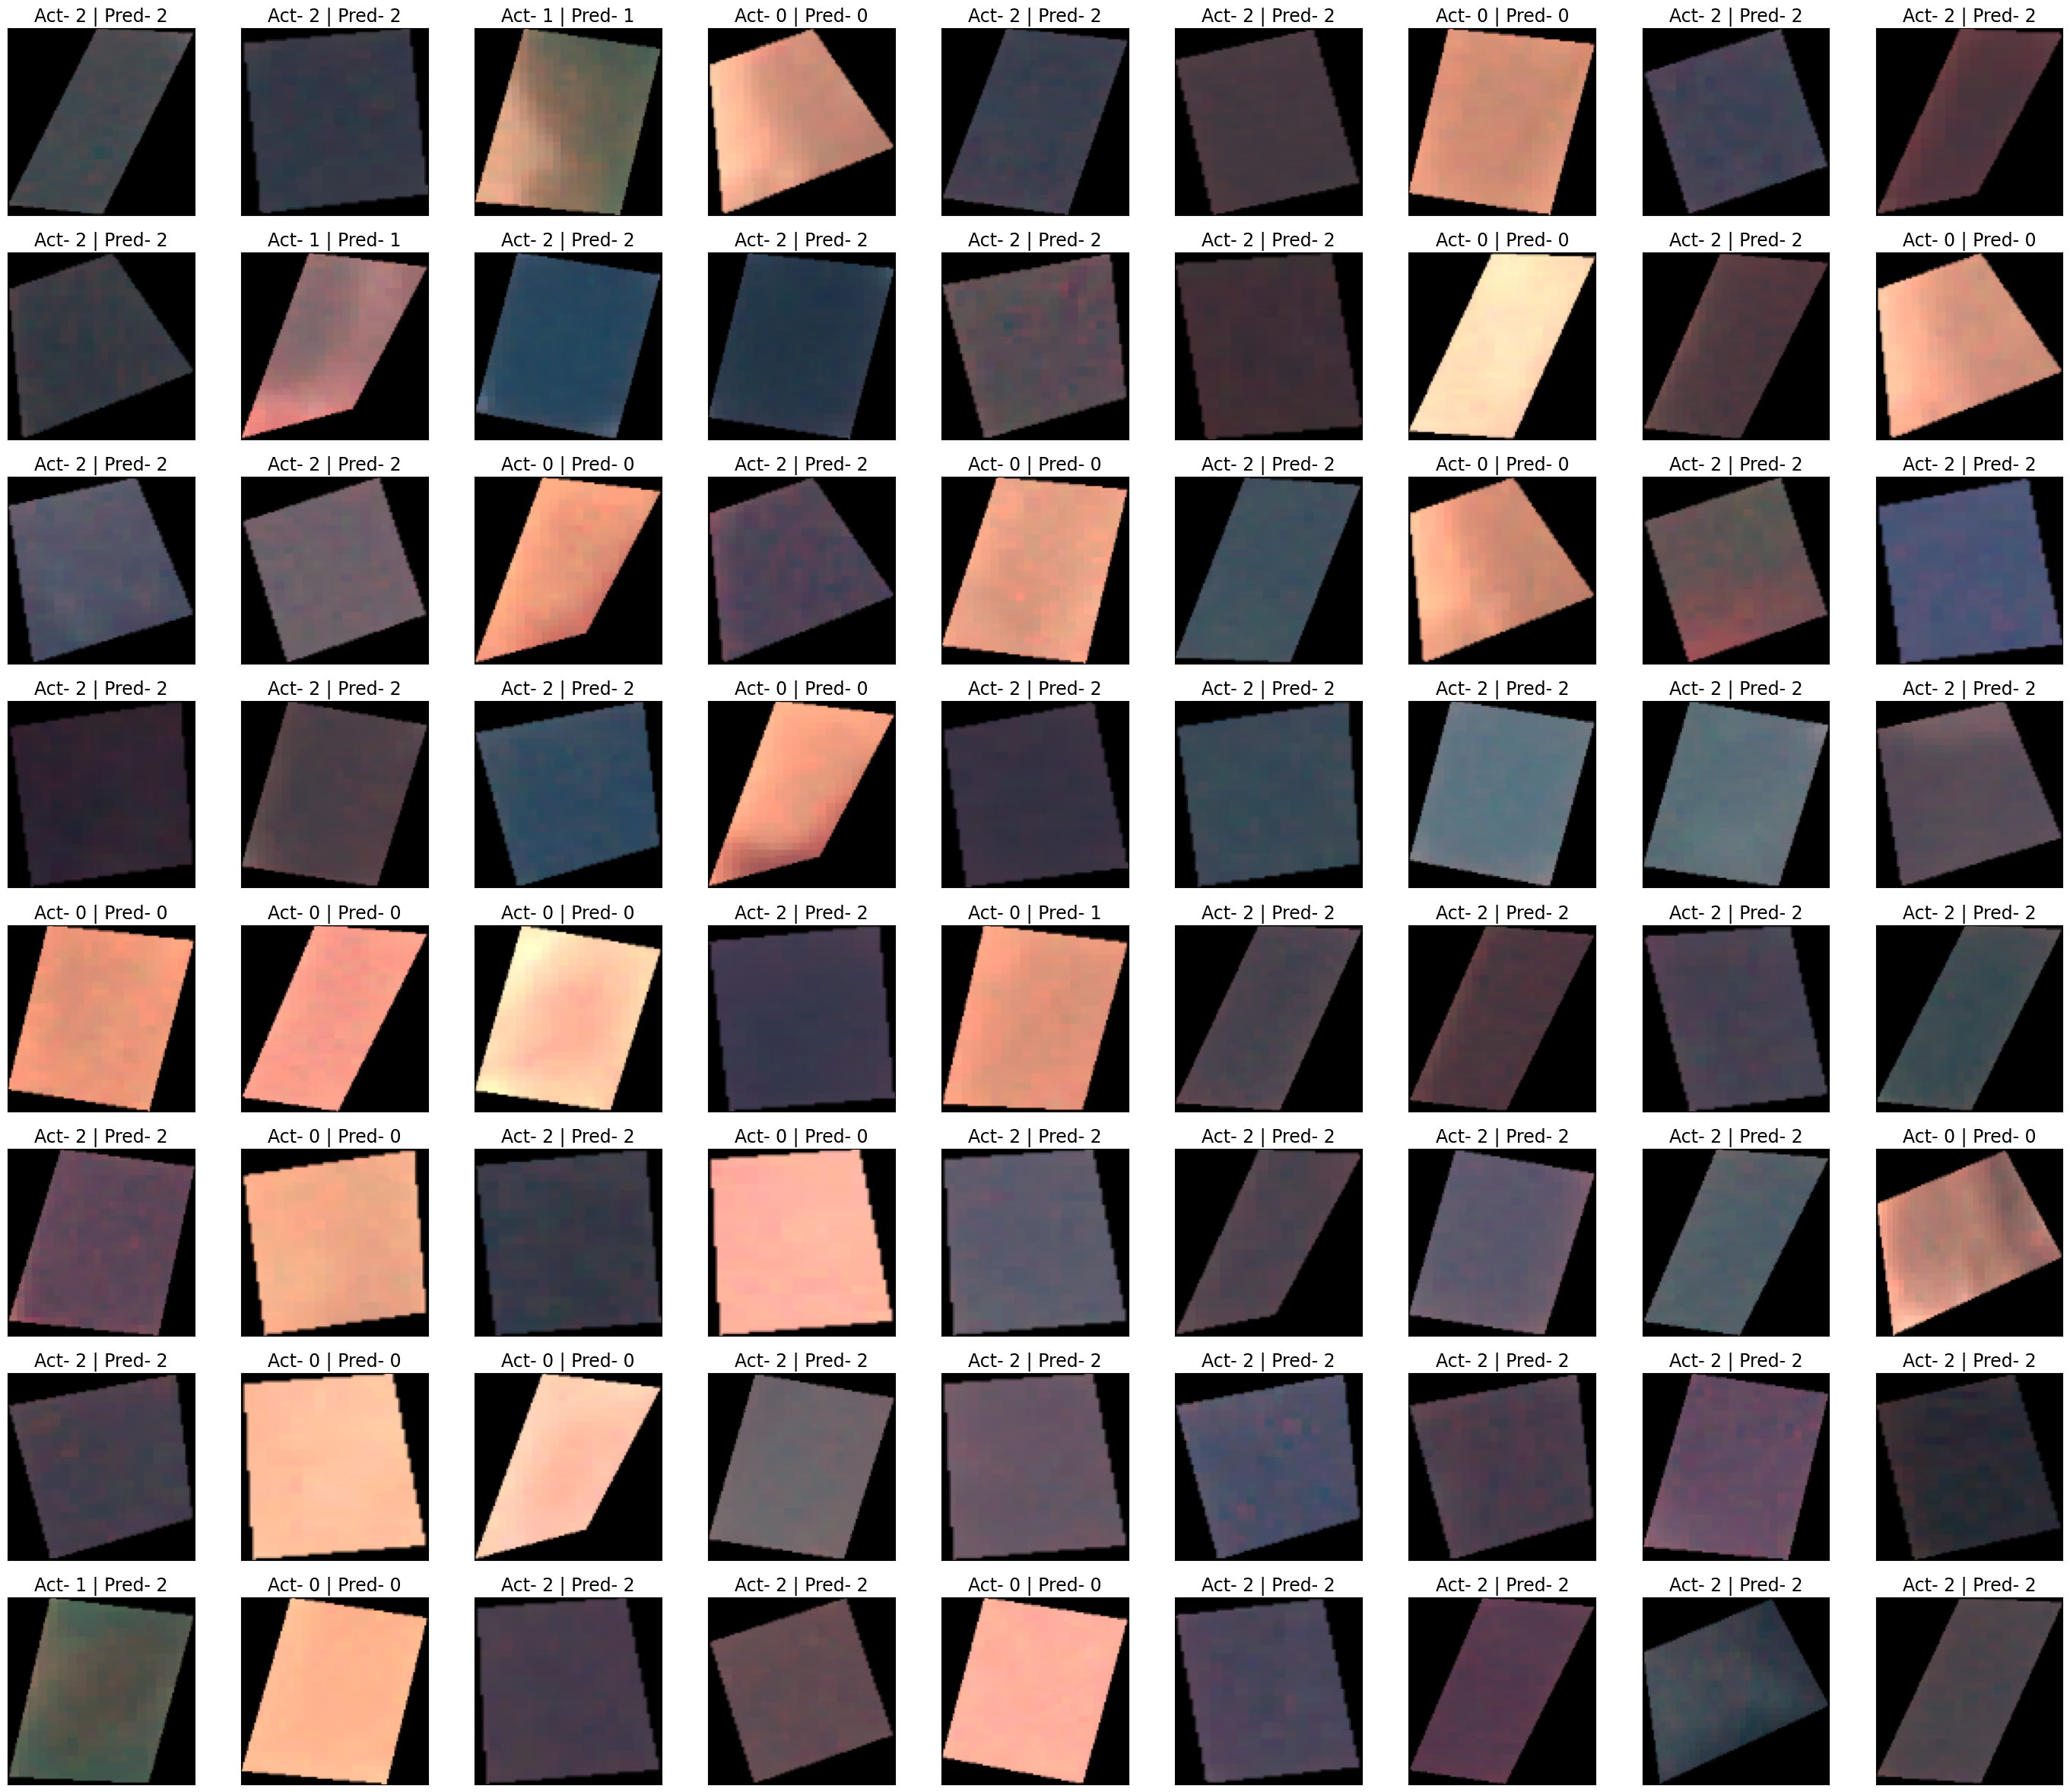

In [30]:
import random
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

def show_images(images, target,pred,start_index):

    fig, axes = plt.subplots(nrows=8, ncols=9, figsize=(35,30))

    counter = start_index
    img= torch.Tensor(images)
    img =img.permute( 0,3,2, 1)
    output = model(img)
    _, pred = torch.max(output, dim=1)
    for i in range(8):
        for j in range(9):

            axes[i,j].set_title('Act- '+ str(target[counter].item())+' | Pred- '+str(pred[counter].item()), fontsize=17)
            axes[i,j].imshow(images[counter], cmap='gray')
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            counter += 1
    plt.show()


from torchvision import models
model = models.resnet50(pretrained=False)
n_inputs = model.fc.in_features
model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256),
                      nn.ReLU(),
                     # nn.Dropout(0.4),
                      nn.Linear(256, 3),
                      nn.LogSoftmax(dim=1))
preds = []
true =[]
for data , target in test_loader:

  model.load_state_dict(torch.load('/content/resnet50-pond.pt'))
  output = model(data)
  _, pred = torch.max(output, dim=1)
  image_batch_permuted = data.permute(0, 2, 3, 1)

  for i in range(len(pred)):
    preds.append(pred[i].item())
    true.append(target[i].item())
  print(len(pred))
  conf_matrix = confusion_matrix(y_true=true, y_pred=pred)

  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  print('precision : ',precision_score(true,pred,average='weighted'))
  print('recall : ', recall_score(true,pred,average='weighted'))
  show_images(image_batch_permuted,target,pred, 0)
